In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv("countries-v1.csv")
print(df.head())
print(df.info())

              utc_time           local_time   country  capital continent  \
0  2025-09-01 00:00:00  2025-09-01 04:00:00  Abkhazia  Sukhumi   Unknown   
1  2025-09-01 06:00:07  2025-09-01 10:00:07  Abkhazia  Sukhumi   Unknown   
2  2025-09-01 12:00:02  2025-09-01 16:00:02  Abkhazia  Sukhumi   Unknown   
3  2025-09-01 18:00:03  2025-09-01 22:00:03  Abkhazia  Sukhumi   Unknown   
4  2025-09-02 00:00:01  2025-09-02 04:00:01  Abkhazia  Sukhumi   Unknown   

   temperature  temp_min  temp_max  humidity  feels_like  ...  cloudcover  \
0        22.15     22.15     22.15      77.0       22.43  ...         0.0   
1        26.83     26.83     26.83      58.0       27.74  ...         1.0   
2        29.20     29.20     29.20      70.0       33.17  ...         0.0   
3        24.07     24.07     24.07      92.0       24.93  ...         1.0   
4        23.73     23.73     23.73      85.0       24.38  ...        85.0   

   wind_speed  wind_gust  wind_direction  pressure  is_day  weather_code  \
0   

In [ ]:
print(df.isnull().sum())
df = df.dropna()

utc_time                0
local_time              0
country                 0
capital                 0
continent               0
temperature             0
temp_min                0
temp_max                0
humidity                0
feels_like              0
visibility             37
precipitation           0
cloudcover              0
wind_speed              0
wind_gust               0
wind_direction          0
pressure                0
is_day                  0
weather_code            0
weather_main            0
weather_description     0
weather_icon            0
dtype: int64


In [ ]:
print(df.describe())

        temperature      temp_min      temp_max      humidity    feels_like  \
count  60695.000000  60695.000000  60695.000000  60695.000000  60695.000000   
mean      21.558837     21.224792     21.827246     71.696828     22.333349   
std        8.903136      8.992929      8.856426     20.017470     10.750754   
min      -60.720000    -60.720000    -60.720000      2.000000    -67.720000   
25%       16.430000     15.920000     16.910000     61.000000     16.010000   
50%       23.910000     23.710000     23.980000     76.000000     24.270000   
75%       27.620000     27.300000     27.860000     87.000000     29.910000   
max       44.660000     44.660000     46.150000    100.000000     49.990000   

         visibility  precipitation    cloudcover    wind_speed     wind_gust  \
count  60695.000000   60695.000000  60695.000000  60695.000000  60695.000000   
mean    9535.426526       0.158653     46.674619      3.610666      2.016538   
std     1503.121417       1.240855     35.986045

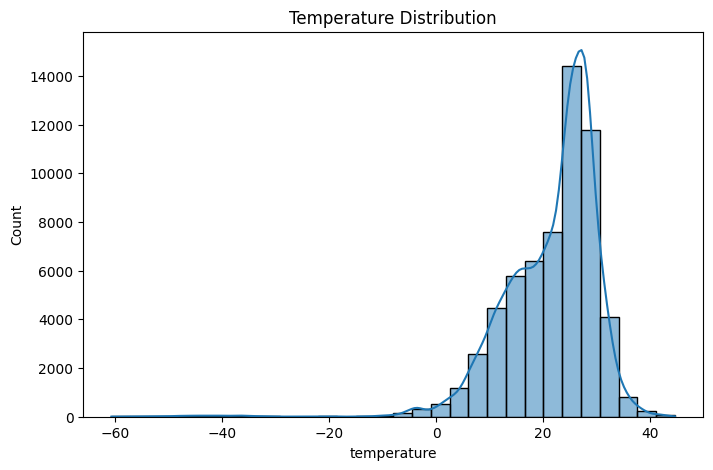

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['temperature'], kde=True, bins=30)
plt.title("Temperature Distribution")
plt.show()

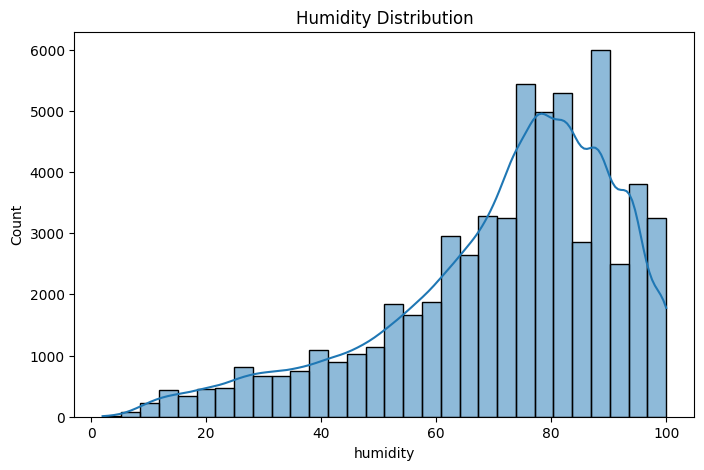

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['humidity'], kde=True, bins=30)
plt.title("Humidity Distribution")
plt.show()

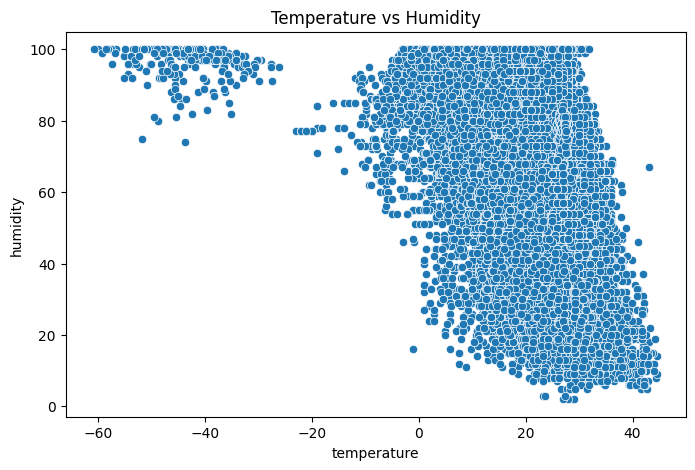

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='temperature', y='humidity', data=df)
plt.title("Temperature vs Humidity")
plt.show()

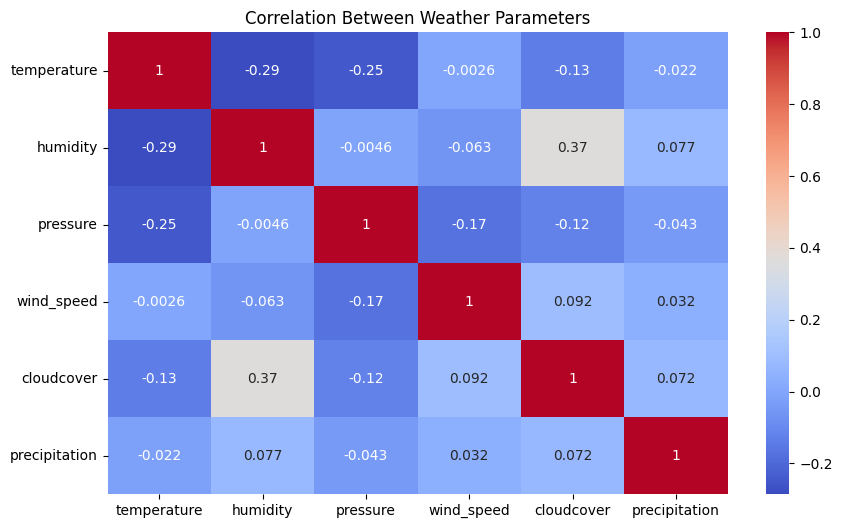

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['temperature', 'humidity', 'pressure', 'wind_speed', 'cloudcover', 'precipitation']].corr(),
            annot=True, cmap="coolwarm")
plt.title("Correlation Between Weather Parameters")
plt.show()

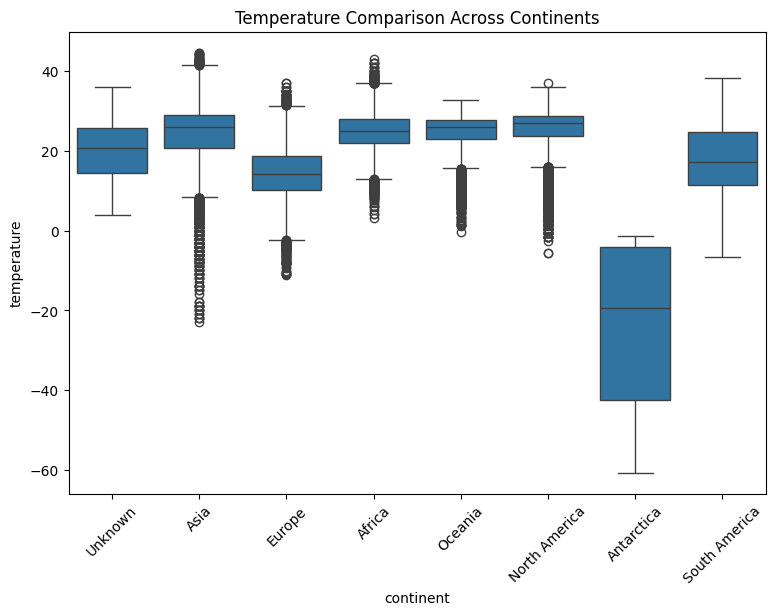

In [ ]:
plt.figure(figsize=(9,6))
sns.boxplot(x='continent', y='temperature', data=df)
plt.title("Temperature Comparison Across Continents")
plt.xticks(rotation=45)
plt.show()

            capital                         country  temperature
7746   Camp Justice  British Indian Ocean Territory        44.66
7718   Camp Justice  British Indian Ocean Territory        44.63
7742   Camp Justice  British Indian Ocean Territory        44.41
28223   Kuwait City                          Kuwait        44.29
25094       Baghdad                            Iraq        43.98
25134       Baghdad                            Iraq        43.98
7722   Camp Justice  British Indian Ocean Territory        43.88
7786   Camp Justice  British Indian Ocean Territory        43.50
7806   Camp Justice  British Indian Ocean Territory        43.43
28267   Kuwait City                          Kuwait        43.20


/tmp/ipython-input-2018152172.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='capital', x='temperature', data=top_hot, palette="Reds_r")


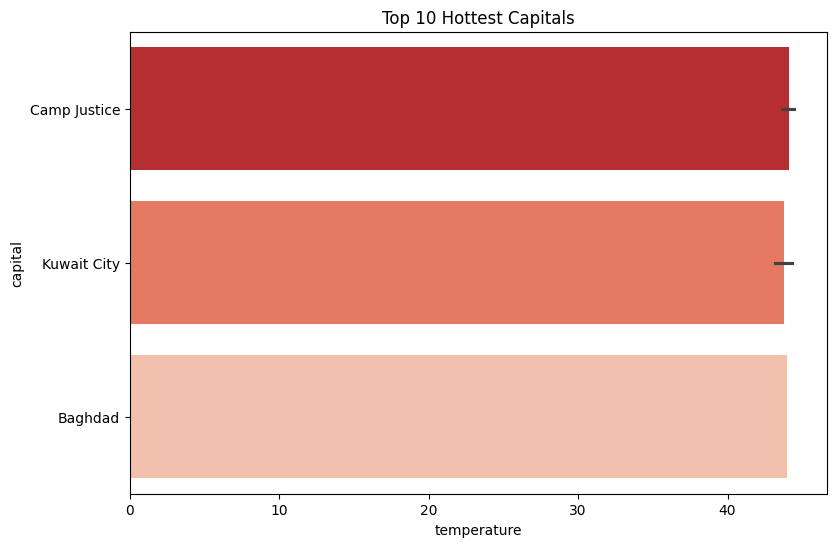

In [ ]:
top_hot = df.nlargest(10, 'temperature')[['capital', 'country', 'temperature']]
print(top_hot)

plt.figure(figsize=(9,6))
sns.barplot(y='capital', x='temperature', data=top_hot, palette="Reds_r")
plt.title("Top 10 Hottest Capitals")
plt.show()

         capital     country  temperature
2179  South Pole  Antarctica       -60.72
2178  South Pole  Antarctica       -59.96
2220  South Pole  Antarctica       -59.14
2221  South Pole  Antarctica       -58.37
2218  South Pole  Antarctica       -58.25
2219  South Pole  Antarctica       -58.10
2217  South Pole  Antarctica       -58.00
2190  South Pole  Antarctica       -57.81
2203  South Pole  Antarctica       -57.49
2202  South Pole  Antarctica       -57.26


/tmp/ipython-input-1599753123.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='capital', x='temperature', data=top_cold, palette="Blues_r")


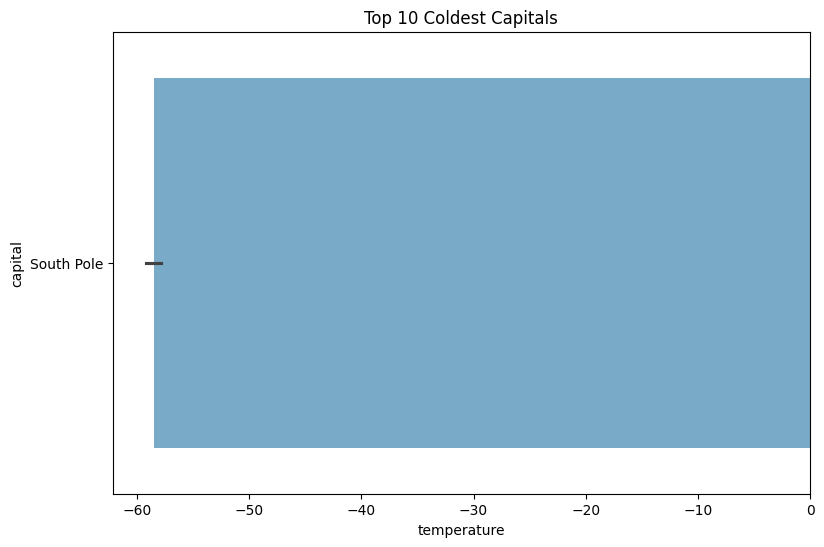

In [ ]:
top_cold = df.nsmallest(10, 'temperature')[['capital', 'country', 'temperature']]
print(top_cold)

plt.figure(figsize=(9,6))
sns.barplot(y='capital', x='temperature', data=top_cold, palette="Blues_r")
plt.title("Top 10 Coldest Capitals")
plt.show()

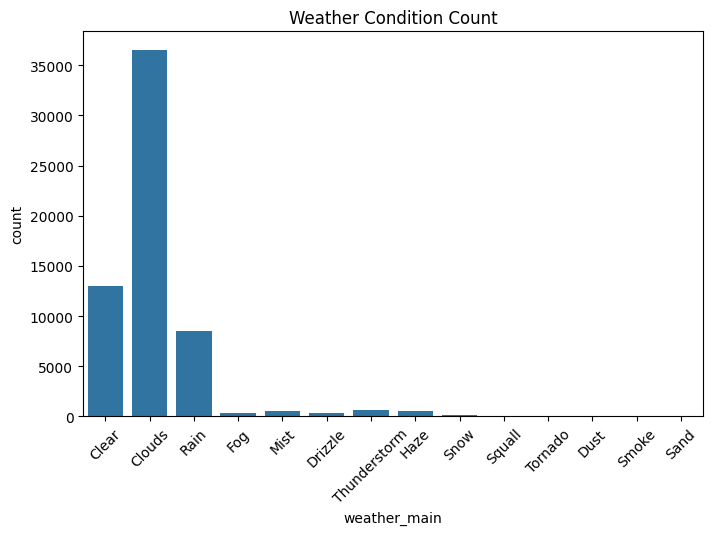

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='weather_main', data=df)
plt.title("Weather Condition Count")
plt.xticks(rotation=45)
plt.show()